In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import regex as re

In [2]:
#read csv file
df=pd.read_csv("D:\movies\movies.csv\movies.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None


In [4]:
print(df.head())

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic

In [5]:
print(df.isnull().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [7]:
# Summary Statistics for Numerical Columns
df[['year', 'score', 'votes', 'budget', 'gross', 'runtime']].describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [8]:
# Summary Statistics for Categorical Columns
# Rating Counts
df['rating'].value_counts(dropna=False)

rating
R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
NaN            77
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: count, dtype: int64

In [9]:
#Genre Count
df['genre'].value_counts(dropna=False)

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: count, dtype: int64

In [10]:
#Country Count
df['country'].value_counts(dropna=False)

country
United States                     5475
United Kingdom                     816
France                             279
Canada                             190
Germany                            117
Australia                           92
Japan                               81
India                               62
Italy                               61
Spain                               47
Hong Kong                           45
Ireland                             43
China                               40
South Korea                         35
Denmark                             32
Sweden                              25
New Zealand                         25
Mexico                              22
Netherlands                         12
Norway                              12
West Germany                        12
Switzerland                         10
Iran                                10
South Africa                         8
Czech Republic                       8
Belgium          

In [11]:
# Company Count Top 10
df['company'].value_counts(dropna=False).head(10)

company
Universal Pictures           377
Warner Bros.                 334
Columbia Pictures            332
Paramount Pictures           320
Twentieth Century Fox        240
New Line Cinema              174
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    125
Walt Disney Pictures         123
TriStar Pictures              94
Name: count, dtype: int64

In [32]:
#Handle missing numerical values with median
numerical_cols = ['budget', 'gross', 'runtime', 'score', 'votes']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [30]:
# Handle missing categorical values with mode
categorical_cols = ['rating', 'country', 'company', 'writer', 'star']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [31]:
# Handle missing 'released' date
df['released'] = df['released'].fillna('Unknown')

print(df.isnull().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


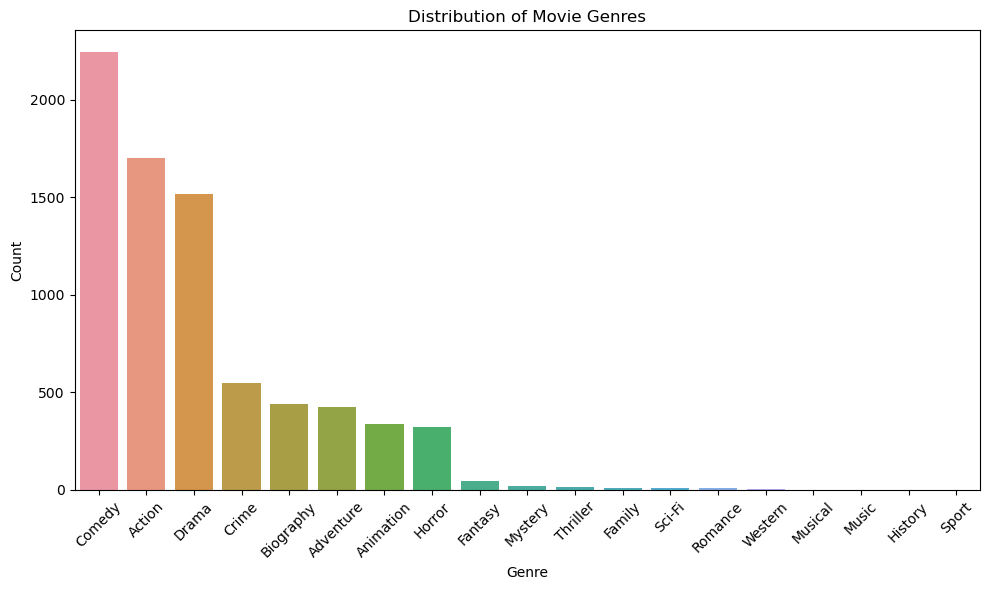

In [19]:
#Bar plot of genre counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

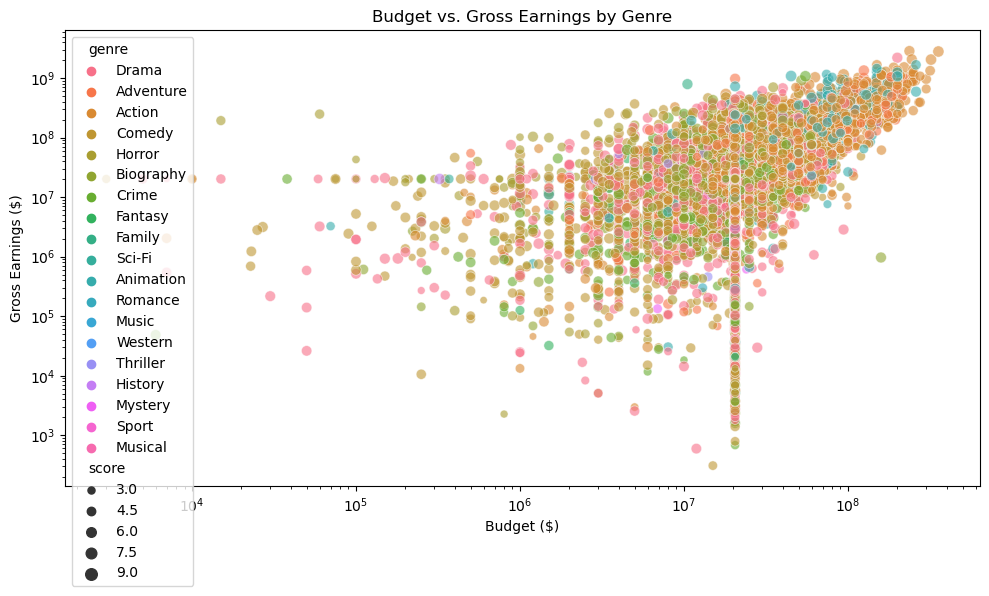

In [18]:
# Scatter plot of budget vs. gross
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='gross', hue='genre', size='score', alpha=0.6)
plt.title('Budget vs. Gross Earnings by Genre')
plt.xlabel('Budget ($)')
plt.ylabel('Gross Earnings ($)')
plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')
plt.tight_layout()
plt.show()

C:\Users\jiten\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


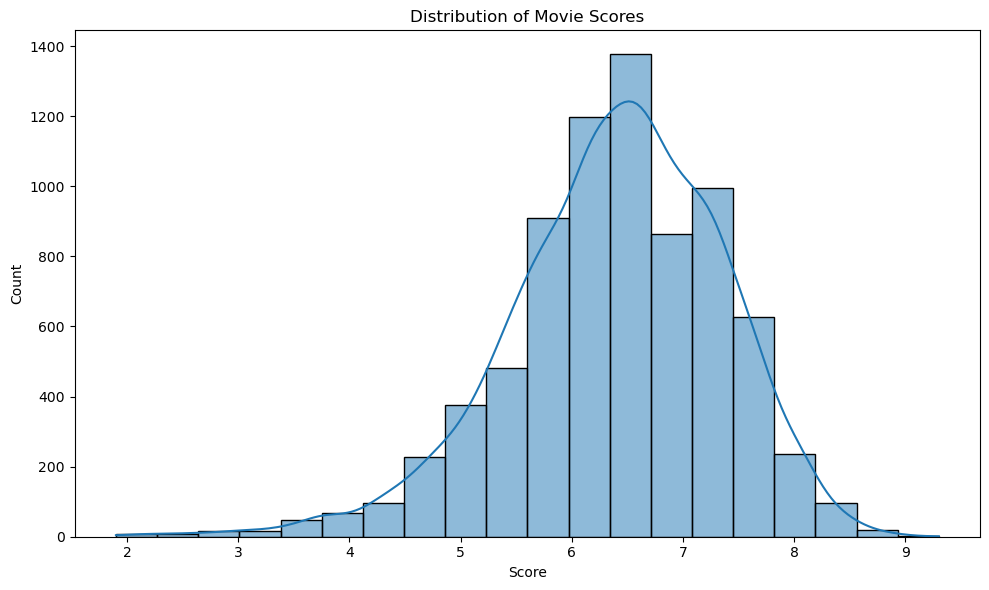

In [21]:
# Histogram of movie scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='score', bins=20, kde=True)
plt.title('Distribution of Movie Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [22]:
# Correlation for numerical columns
numerical_cols = ['budget', 'gross', 'score', 'votes', 'runtime', 'year']
correlation_matrix = df[numerical_cols].corr()

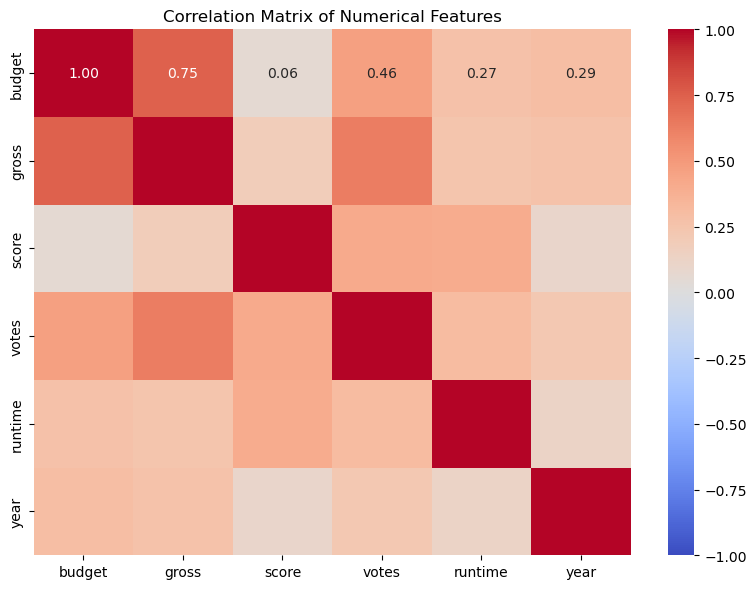

In [23]:
#Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [24]:
# Filter top 10 movies by gross earnings
top_10_gross = df.nlargest(10, 'gross')[['name', 'genre', 'year', 'score', 'budget', 'gross', 'company']]
print("\nTop 10 Movies by Gross Earnings:")
print(top_10_gross)


Top 10 Movies by Gross Earnings:
                                            name      genre  year  score  \
5445                                      Avatar     Action  2009    7.8   
7445                           Avengers: Endgame     Action  2019    8.4   
3045                                     Titanic      Drama  1997    7.8   
6663  Star Wars: Episode VII - The Force Awakens     Action  2015    7.8   
7244                      Avengers: Infinity War     Action  2018    8.4   
7480                               The Lion King  Animation  2019    6.9   
6653                              Jurassic World     Action  2015    7.0   
6043                                The Avengers     Action  2012    8.0   
6646                                   Furious 7     Action  2015    7.1   
7494                                   Frozen II  Animation  2019    6.8   

           budget         gross                        company  
5445  237000000.0  2.847246e+09          Twentieth Century Fox  

In [25]:
# Genre Counts in Top 10 Grossing Movies

In [26]:
top_10_gross['genre'].value_counts()

genre
Action       7
Animation    2
Drama        1
Name: count, dtype: int64

In [27]:
# Average Score of Top 10 Grossing Movies
top_10_gross['score'].mean()

7.599999999999999

In [28]:
#Average Budget of Top 10 Grossing Movies
top_10_gross['budget'].mean()

232900000.0

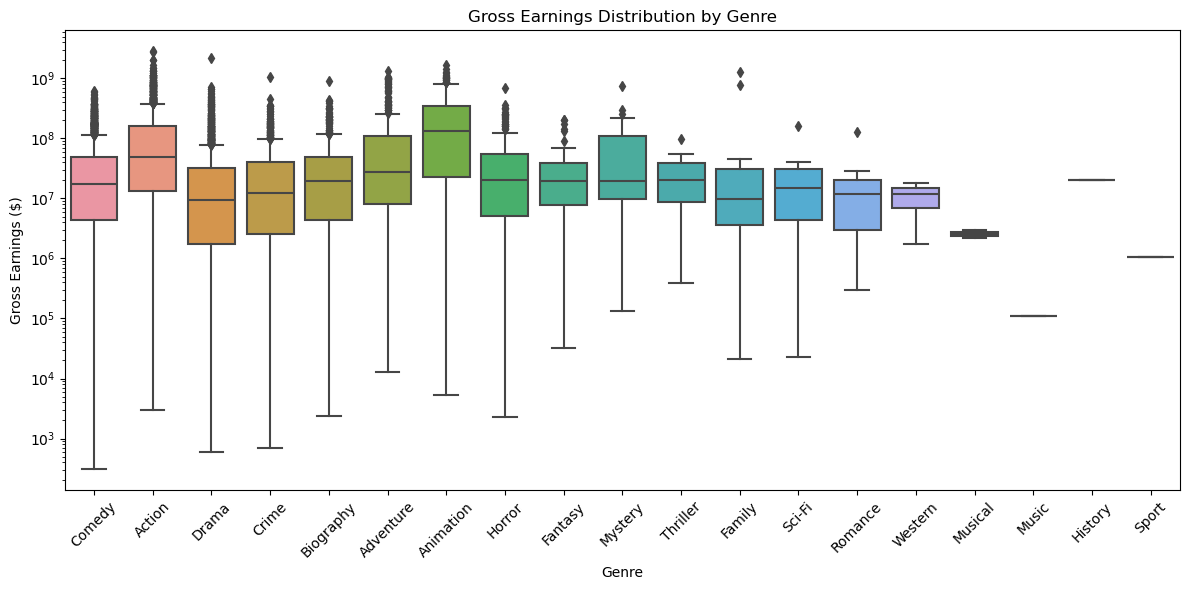

In [29]:
# Box plot of gross earnings by genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='genre', y='gross', order=df['genre'].value_counts().index)
plt.title('Gross Earnings Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Gross Earnings ($)')
plt.yscale('log')  # Log scale for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Filter for high-score movies
high_score_movies = df[df['score'] >= 8.0]

high_score_movies[['name', 'genre', 'year', 'score', 'gross', 'budget']].head(10)

,name,genre,year,score,gross,budget
0,The Shining,Drama,1980,8.4,46998772.0,19000000.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,538375067.0,18000000.0
7,Raging Bull,Biography,1980,8.2,23402427.0,18000000.0
49,Lion of the Desert,Biography,1980,8.3,20205757.0,35000000.0
66,Moscow Does Not Believe in Tears,Comedy,1980,8.1,20205757.0,900000.0
92,Indiana Jones and the Raiders of the Lost Ark,Action,1981,8.4,389925971.0,18000000.0
102,Das Boot,Adventure,1981,8.3,11487676.0,20500000.0
206,Blade Runner,Action,1982,8.1,41676878.0,28000000.0
207,The Thing,Horror,1982,8.1,19632053.0,15000000.0
220,Gandhi,Biography,1982,8.0,52767889.0,22000000.0


In [35]:
# calculate average gross by genre
gross_by_genre = df.groupby('genre')['gross'].mean().sort_values(ascending=False).reset_index()
print(gross_by_genre) 

        genre         gross
0   Animation  2.372860e+08
1      Family  1.961725e+08
2      Action  1.431569e+08
3   Adventure  1.078643e+08
4     Mystery  1.011835e+08
5   Biography  4.724975e+07
6      Horror  4.610688e+07
7      Comedy  4.376230e+07
8       Crime  3.908766e+07
9       Drama  3.831419e+07
10    Fantasy  3.828879e+07
11     Sci-Fi  3.009014e+07
12   Thriller  2.525288e+07
13    Romance  2.288065e+07
14    History  2.020576e+07
15    Western  1.067530e+07
16    Musical  2.595346e+06
17      Sport  1.067629e+06
18      Music  1.100140e+05


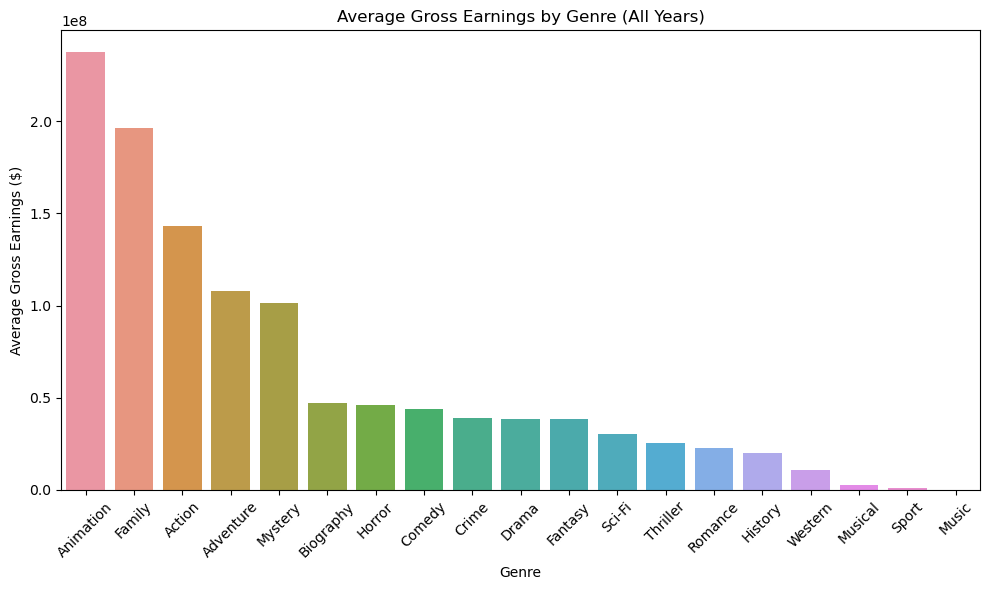

In [36]:
# Bar plot of average gross by genre
plt.figure(figsize=(10, 6))
sns.barplot(data=gross_by_genre, x='genre', y='gross')
plt.title('Average Gross Earnings by Genre (All Years)')
plt.xlabel('Genre')
plt.ylabel('Average Gross Earnings ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
# Summary table for all movies by genre
summary_by_genre = df.groupby('genre').agg({
    'score': 'mean',
    'budget': 'mean',
    'gross': 'mean',
    'name': 'count'
}).rename(columns={'name': 'count'}).reset_index()

print(summary_by_genre)

        genre     score        budget         gross  count
0      Action  6.202991  5.195644e+07  1.431569e+08   1705
1   Adventure  6.291569  3.992286e+07  1.078643e+08    427
2   Animation  6.769231  6.613482e+07  2.372860e+08    338
3   Biography  7.030926  2.392185e+07  4.724975e+07    443
4      Comedy  6.193987  2.191772e+07  4.376230e+07   2245
5       Crime  6.671506  2.186977e+07  3.908766e+07    551
6       Drama  6.693412  2.189977e+07  3.831419e+07   1518
7      Family  6.363636  3.163636e+07  1.961725e+08     11
8     Fantasy  6.006818  1.705000e+07  3.828879e+07     44
9     History  8.300000  3.235620e+05  2.020576e+07      1
10     Horror  5.750621  1.420758e+07  4.610688e+07    322
11      Music  7.200000  2.050000e+07  1.100140e+05      1
12    Musical  8.050000  2.050000e+07  2.595346e+06      2
13    Mystery  6.665000  3.017000e+07  1.011835e+08     20
14    Romance  6.410000  2.227000e+07  2.288065e+07     10
15     Sci-Fi  6.210000  1.988700e+07  3.009014e+07     